# Bias correction of numerical prediction model temperature forecast

In [4]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
#load dataset with parsing dates
df = pd.read_csv('Bias_correction_ucl.csv',parse_dates=['Date'])
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [6]:
#basic insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

In [7]:
#column names
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [8]:
#check for null values
print(df.isna().values.any())
df.isnull().sum()

True


station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
#check shape
df.shape

(7752, 25)

In [10]:
#drop null rows
df=df.dropna()

In [11]:
#check shape again
df.shape

(7588, 25)

In [12]:
#lets work on date column to make it usable in model.
df['month']=df['Date'].apply(lambda x:x.month)
df['year']=df['Date'].dt.year
df['day']=df['Date'].apply(lambda x:x.day)
df=df.drop('Date',axis=1)

In [13]:
#check our dataset
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,year,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,2013,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,2013,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,2013,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,2013,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,2013,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8,2017,30
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8,2017,30
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8,2017,30
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8,2017,30


In [14]:
#statistical insights
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
station,7588.0,13.014101,7.217858,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7588.0,29.748366,2.967401,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7588.0,23.195809,2.400880,11.300000,21.600000,23.400000,24.800000,29.900000
LDAPS_RHmin,7588.0,56.724969,14.626559,19.794666,45.960243,55.023199,67.115099,98.524734
LDAPS_RHmax,7588.0,88.360823,7.199456,58.936283,84.203724,89.784122,93.742725,100.000153
LDAPS_Tmax_lapse,7588.0,29.620128,2.943496,17.624954,27.673756,29.709537,31.711109,38.542255
LDAPS_Tmin_lapse,7588.0,23.511786,2.342579,14.272646,22.086820,23.758249,25.155660,29.619342
LDAPS_WS,7588.0,7.094097,2.177034,2.882580,5.675358,6.547838,8.028960,21.857621
LDAPS_LH,7588.0,62.492606,33.686158,-13.603212,37.206201,56.898324,84.235666,213.414006
LDAPS_CC1,7588.0,0.368510,0.262260,0.000000,0.146546,0.315706,0.574174,0.967277


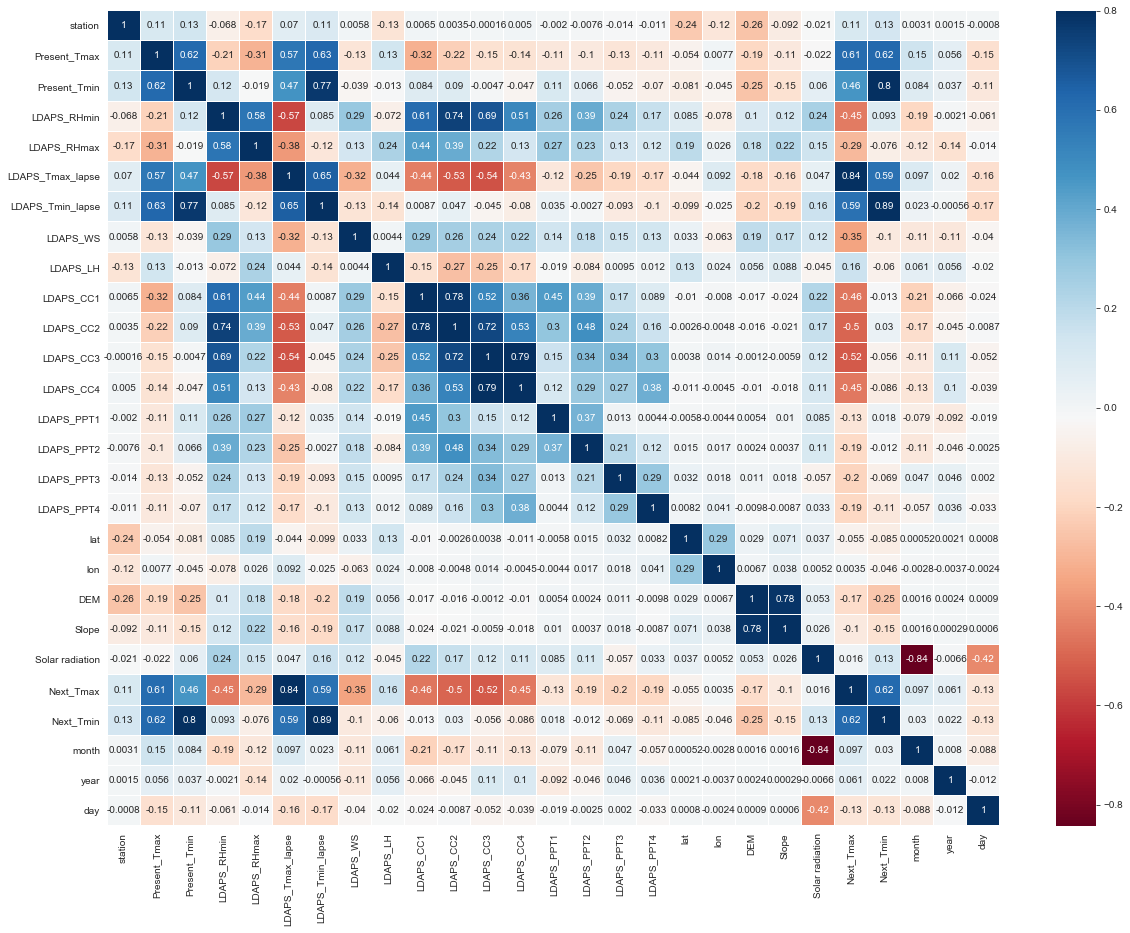

In [15]:
# Correlation Plot
corrmat = df.corr()

#Set the matplolib figure
f, ax = plt.subplots(figsize=(20, 15))

#the heatmap using seaborn
colormap = plt.cm.RdBu
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

In [16]:
#lets check whether their are outliers present in the dataset or not
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(7588, 27)
(6739, 27)


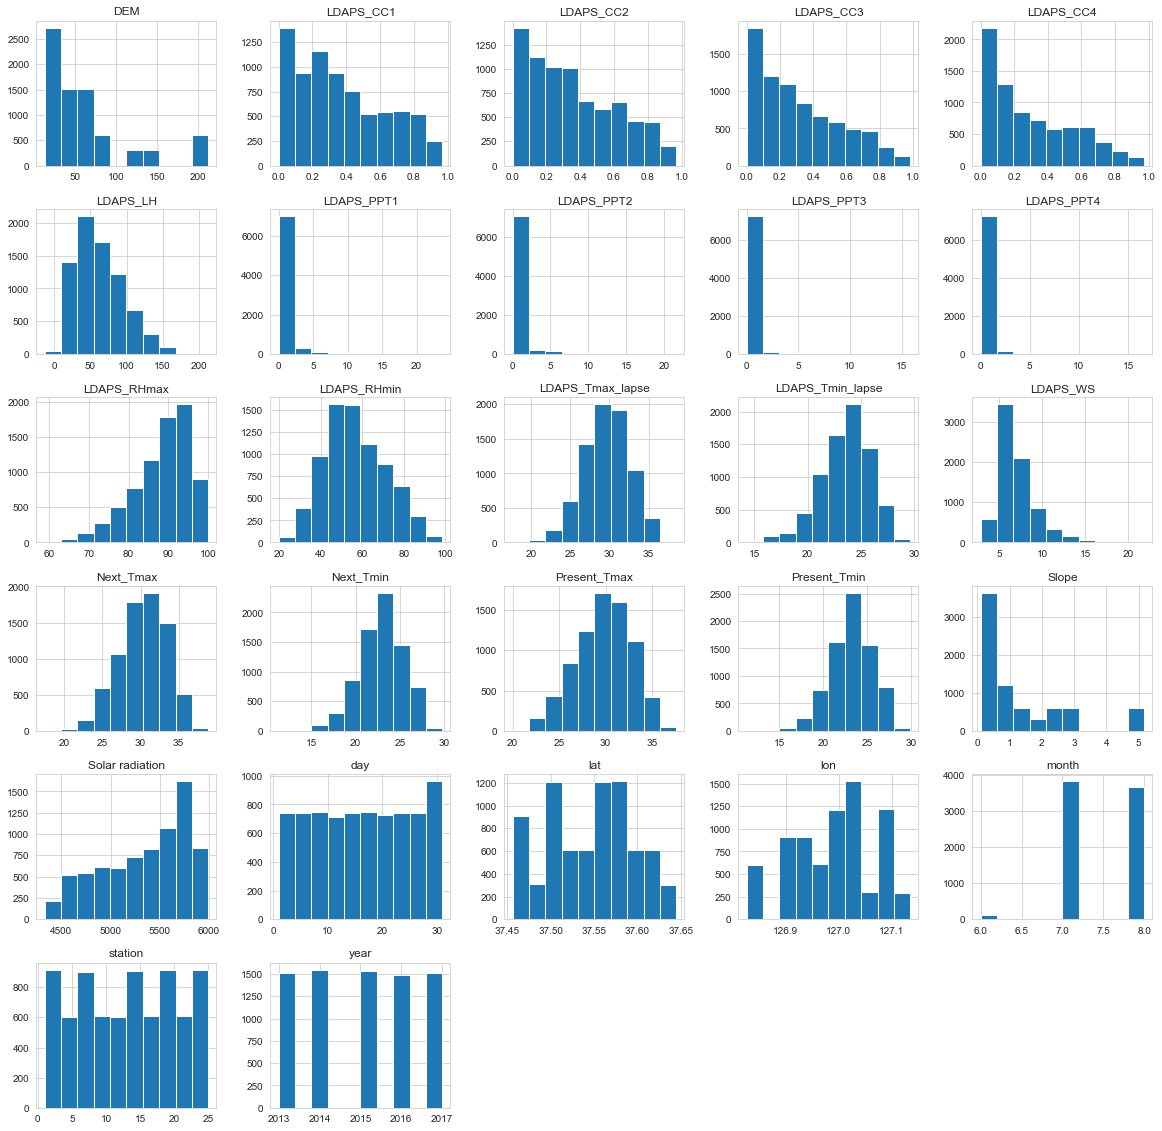

In [17]:
#EDA graphical visualisation.
df.hist(figsize=(20,20))
plt.show()

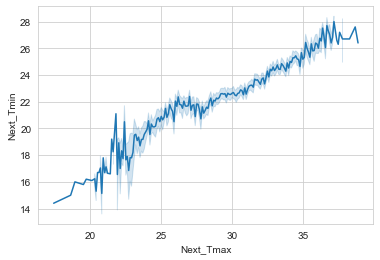

In [18]:
#we see a leniar relation between our two target attributes. 
sns.lineplot(x=df['Next_Tmax'],y=df['Next_Tmin'],data=df)
plt.show()

In [19]:
#seprating input and output
#target_name=['Next_Tmax','Next_Tmin']
df_x=df.drop(columns=['Next_Tmax','Next_Tmin'])
y=df[['Next_Tmax','Next_Tmin']]

In [20]:
# scaling down using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)
    return final_r_state

In [22]:
#lets use linear regression
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)



max r2 score corresponding to random state: 43 is 0.824563531558445


In [23]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [24]:
#lets use KNN Regression
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x,y)



max r2 score corresponding to random state: 43 is 0.830206722104806


In [25]:
#lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print('\n\n Mean r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for linear regression :  0.7328121381818071
Standard deviation in r2 score for Linear Regression :  0.07009508942491335


 Mean r2 score for KNN Regression :  0.5928674824723283
Standard deviation in r2 score for KNN Regression :  0.10165002507479085


In [26]:
#lets check Lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [27]:
#lets check max r2 score when we use lasso
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)



max r2 score corresponding to random state: 43 is 0.8226431731541419


In [28]:
#lets use cross val score with lasso
print("Mean r2 score for lasso regression : ",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation for lasso ragression : ',cross_val_score(lsreg,x,y,scoring='r2').std())

Mean r2 score for lasso regression :  0.7411151619241272
standard deviation for lasso ragression :  0.06478348605498023


In [29]:
# we tried all the model and till now ada boost regression is the best
#random state corresponding to highest r2_score is 43
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94,test_size=0.30)
knr=KNeighborsRegressor(n_neighbors=29)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [30]:
#lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))

RMSE is :  1.20137169244781
r2_score is :  0.8178911526061583


In [43]:
#save best model i.e. KNeighborsRegressor 
import pickle
pickle.dump(knr,open('Next_Tmax_Tmin_model.obj','wb'))

In [44]:
#open saved model for predicion
M=open('Next_Tmax_Tmin_model.obj','rb')
model=pickle.load(M)

In [45]:
#predict
result=pd.DataFrame(model.predict(x_test))

In [46]:
#save prediction
result.to_csv('Next_Tmax_Tmin_prdictresults.csv')

In [47]:
#close model file
M.close()

***